In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

datadir = "C:\\Users\\Poonam\\OneDrive - Ishaan\\Desktop\\Ishaan\\Assignments\\sem4\\AI_MINOR\\Project\\archive\\train"
categories = ["Closed", "Open"]
image_size=255;

In [24]:
training_data = []

def create_training_data():
    for category in categories: 
        path = os.path.join(datadir,category)  
        class_num=categories.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array=cv2.resize(img_array,(image_size, image_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [25]:
print(len(training_data))

1200


In [26]:
import random

random.shuffle(training_data)

In [27]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
1
0
0


In [43]:
X=[]
y=[]

In [44]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1, image_size, image_size, 1)

In [45]:
X.shape

(1200, 255, 255, 1)

In [46]:
X=X/255.0

In [47]:
X

array([[[[0.47843137],
         [0.48235294],
         [0.48235294],
         ...,
         [0.54901961],
         [0.5372549 ],
         [0.53333333]],

        [[0.47843137],
         [0.48235294],
         [0.48235294],
         ...,
         [0.5372549 ],
         [0.52941176],
         [0.52156863]],

        [[0.47843137],
         [0.48235294],
         [0.48627451],
         ...,
         [0.5254902 ],
         [0.52156863],
         [0.51764706]],

        ...,

        [[0.56078431],
         [0.56078431],
         [0.56078431],
         ...,
         [0.5254902 ],
         [0.53333333],
         [0.53333333]],

        [[0.56078431],
         [0.56078431],
         [0.56078431],
         ...,
         [0.5254902 ],
         [0.52941176],
         [0.53333333]],

        [[0.56078431],
         [0.55686275],
         [0.55686275],
         ...,
         [0.52156863],
         [0.5254902 ],
         [0.52941176]]],


       [[[0.67058824],
         [0.61176471],
         [0.59

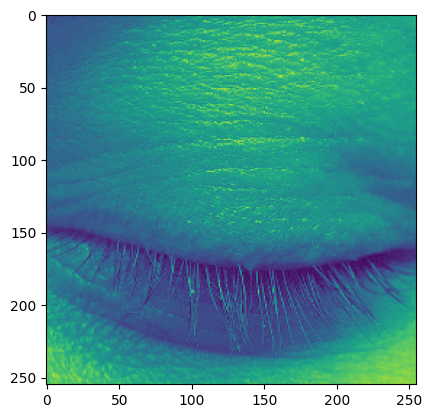

In [48]:
plt.imshow(X[45])

In [49]:
Y=np.array(y)

In [35]:
print(y[45])

0


In [161]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [162]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y=pickle.load(pickle_in)

In [163]:
from tensorflow import keras
from tensorflow.keras import layers

In [164]:
model = tf.keras.applications.mobilenet.MobileNet()

In [165]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape    ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_6          │ (None, 224,     │         0 │
│ (InputLayer)           │ 224, 3)         │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1 (Conv2D)         │ (None, 112,     │       864 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1_bn               │ (None, 112,     │       128 │
│ (BatchNormalization)   │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1_relu (ReLU)      │ (None, 112,     │         0 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1              │ (None, 112,     │       288 │
│ (DepthwiseConv2D)      │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1_bn           │ (None, 112,     │       128 │
│ (BatchNormalization)   │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1_relu (ReLU)  │ (None, 112,     │         0 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1 (Conv2D)     │ (None, 112,     │     2,048 │
│                        │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1_bn           │ (None, 112,     │       256 │
│ (BatchNormalization)   │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1_relu (ReLU)  │ (None, 112,     │         0 │
│                        │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pad_2             │ (None, 113,     │         0 │
│ (ZeroPadding2D)        │ 113, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2              │ (None, 56, 56,  │       576 │
│ (DepthwiseConv2D)      │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2_bn           │ (None, 56, 56,  │       256 │
│ (BatchNormalization)   │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2 (Conv2D)     │ (None, 56, 56,  │     8,192 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3              │ (None, 56, 56,  │     1,152 │
│ (DepthwiseConv2D)      │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3 (Conv2D)     │ (None, 56, 56,  │    16,384 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3_relu (ReLU)  │ (None, 56, 56,  │         0 │
│         

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [166]:
base_input = model.layers[1].input

In [167]:
base_output = model.layers[-4].output

In [168]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [169]:
new_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape    ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ input_layer_6          │ (None, 224,     │         0 │
│ (InputLayer)           │ 224, 3)         │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1 (Conv2D)         │ (None, 112,     │       864 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1_bn               │ (None, 112,     │       128 │
│ (BatchNormalization)   │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv1_relu (ReLU)      │ (None, 112,     │         0 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1              │ (None, 112,     │       288 │
│ (DepthwiseConv2D)      │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1_bn           │ (None, 112,     │       128 │
│ (BatchNormalization)   │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_1_relu (ReLU)  │ (None, 112,     │         0 │
│                        │ 112, 32)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1 (Conv2D)     │ (None, 112,     │     2,048 │
│                        │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1_bn           │ (None, 112,     │       256 │
│ (BatchNormalization)   │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_1_relu (ReLU)  │ (None, 112,     │         0 │
│                        │ 112, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pad_2             │ (None, 113,     │         0 │
│ (ZeroPadding2D)        │ 113, 64)        │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2              │ (None, 56, 56,  │       576 │
│ (DepthwiseConv2D)      │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2_bn           │ (None, 56, 56,  │       256 │
│ (BatchNormalization)   │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_2_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2 (Conv2D)     │ (None, 56, 56,  │     8,192 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_2_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3              │ (None, 56, 56,  │     1,152 │
│ (DepthwiseConv2D)      │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_dw_3_relu (ReLU)  │ (None, 56, 56,  │         0 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3 (Conv2D)     │ (None, 56, 56,  │    16,384 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3_bn           │ (None, 56, 56,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv_pw_3_relu (ReLU)  │ (None, 56, 56,  │         0 │
│         

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [170]:
new_model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics= ["accuracy"])

In [171]:
history=new_model.fit(X,Y, epochs =2, validation_split = 0.1)

Epoch 1/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.5422 - loss: 1.6481 - val_accuracy: 0.5102 - val_loss: 4.3415
Epoch 2/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.6810 - loss: 0.7064 - val_accuracy: 0.5102 - val_loss: 3.3324


In [172]:
new_model.save('train_memory.h5')

In [173]:
new_model = tf.keras.models.load_model('train_memory.h5')

In [174]:
img_array = cv2.imread("C:\\Users\\Poonam\\OneDrive - Ishaan\\Desktop\\Ishaan\\Assignments\\sem4\\AI_MINOR\\Project\\archive\\train\\Closed\\_15.jpg", cv2.IMREAD_GRAYSCALE)
bg=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(bg, (image_size, image_size))

In [175]:
X_input=np.array(new_array).reshape(1, image_size, image_size, 3)

In [176]:
X_input.shape

(1, 224, 224, 3)

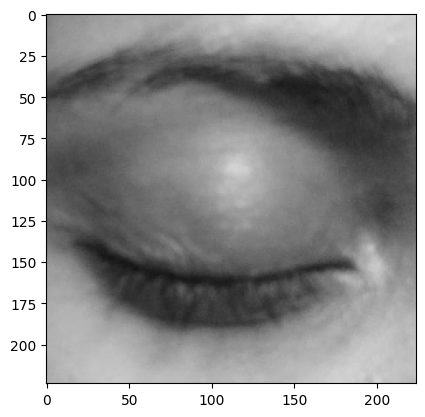

In [177]:
plt.imshow(new_array)

In [178]:
X_input=X_input/255.0

In [179]:
prediction=new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [183]:
prediction

array([[1.0597551e-05]], dtype=float32)

ValueError: You must call `compile()` before using the model.

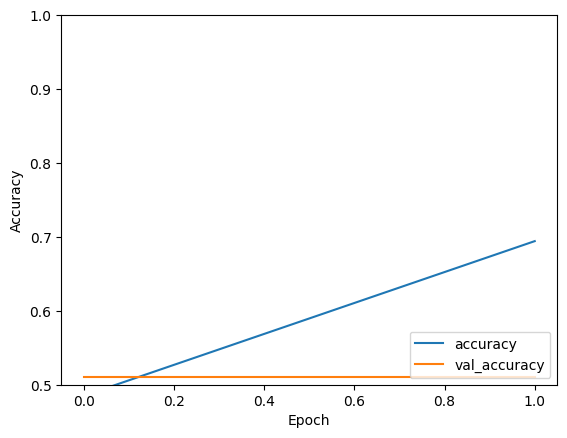

In [184]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X,Y, verbose=2)